In [192]:
import numpy as np 
import pandas as pd
import re

In [193]:
file_ptr = open('WhatsApp Chat with PAISE TO KABHI NHI HOTE 💀.txt', 'r', encoding='utf-8')

In [194]:
data = file_ptr.read()

In [195]:
print(data)

05/12/2022, 11:14 am - Sandeep created group "Home coming"
05/12/2022, 11:14 am - You were added
29/03/2023, 1:20 pm - +91 84680 82755: https://youtube.com/shorts/zvFPaM-NwHw?feature=share
29/03/2023, 1:32 pm - Ankit Rajput: People who don't lift weight?🧐
29/03/2023, 1:33 pm - +91 84680 82755: Is topic pe phle daal de
29/03/2023, 1:33 pm - +91 84680 82755: https://youtube.com/shorts/JmPSGL6nolY?feature=share
31/03/2023, 4:35 pm - You deactivated the community "Kelaas"
31/03/2023, 4:35 pm - You removed this group from a community
12/04/2023, 3:49 pm - Babu: <Media omitted>
12/04/2023, 3:50 pm - +91 84680 82755: Tihad jail ki photo kio bheji tune application pr
12/04/2023, 3:51 pm - Babu: Bhai whi khichte ha
12/04/2023, 3:53 pm - +91 84680 82755: Ok bhai
12/04/2023, 3:53 pm - +91 84680 82755: Ye abhi to home coming kio hai
12/04/2023, 3:54 pm - Ankit Rajput: Because some people are stills away from home 🥺🥺
12/04/2023, 3:55 pm - Ankit Rajput: <Media omitted>
12/04/2023, 3:56 pm - Babu: An

In [196]:
len(data)

58666

In [197]:
msg_pattern = '\d{1,2}/\d{1,2}/\d{4},\s\d{1,2}:\d{1,2}\s\w{2}\s-\s'

In [198]:
message = re.split(msg_pattern, data)[1:]
len(message)

1023

In [199]:
date_time = re.findall(msg_pattern,data)
len(date_time)

1023

In [200]:
message[0:5]

['Sandeep created group "Home coming"\n',
 'You were added\n',
 '+91 84680 82755: https://youtube.com/shorts/zvFPaM-NwHw?feature=share\n',
 "Ankit Rajput: People who don't lift weight?🧐\n",
 '+91 84680 82755: Is topic pe phle daal de\n']

In [201]:
date_time[0:5]

['05/12/2022, 11:14\u202fam - ',
 '05/12/2022, 11:14\u202fam - ',
 '29/03/2023, 1:20\u202fpm - ',
 '29/03/2023, 1:32\u202fpm - ',
 '29/03/2023, 1:33\u202fpm - ']

In [202]:
df = pd.DataFrame({'message' : message, 'date-time' : date_time})
df['date-time'] = pd.to_datetime(df['date-time'], format='%d/%m/%Y, %I:%M %p - ')
df.head(3)

,message,date-time
0,"Sandeep created group ""Home coming""\n",2022-12-05 11:14:00
1,You were added\n,2022-12-05 11:14:00
2,+91 84680 82755: https://youtube.com/shorts/zv...,2023-03-29 13:20:00


In [203]:
df.shape

(1023, 2)

In [204]:
user = []
user_msg = []
for msg in df['message']:
    split_string = re.split(r"\s*:\s*", msg, maxsplit=1)
    if(len(split_string)) > 1 : 
        number = split_string[0]
        message = split_string[1]
        user.append(number)
        user_msg.append(message)
    else :
        user.append('Notification')
        user_msg.append(msg)

df['User'] = user 
df['Message'] = user_msg
df.drop(['message'], axis = 1, inplace=True)

In [205]:
df.head()

,date-time,User,Message
0,2022-12-05 11:14:00,Notification,"Sandeep created group ""Home coming""\n"
1,2022-12-05 11:14:00,Notification,You were added\n
2,2023-03-29 13:20:00,+91 84680 82755,https://youtube.com/shorts/zvFPaM-NwHw?feature...
3,2023-03-29 13:32:00,Ankit Rajput,People who don't lift weight?🧐\n
4,2023-03-29 13:33:00,+91 84680 82755,Is topic pe phle daal de\n


In [206]:
df['day'] = df['date-time'].dt.day
df['month'] = df['date-time'].dt.month
df['year'] = df['date-time'].dt.year
df['hour'] = df['date-time'].dt.hour
df['minute'] = df['date-time'].dt.minute


In [207]:
df.head()

,date-time,User,Message,day,month,year,hour,minute
0,2022-12-05 11:14:00,Notification,"Sandeep created group ""Home coming""\n",5,12,2022,11,14
1,2022-12-05 11:14:00,Notification,You were added\n,5,12,2022,11,14
2,2023-03-29 13:20:00,+91 84680 82755,https://youtube.com/shorts/zvFPaM-NwHw?feature...,29,3,2023,13,20
3,2023-03-29 13:32:00,Ankit Rajput,People who don't lift weight?🧐\n,29,3,2023,13,32
4,2023-03-29 13:33:00,+91 84680 82755,Is topic pe phle daal de\n,29,3,2023,13,33


In [208]:
# All message 
len(df['Message'])

1023

In [209]:
# User defined 
len(df[df['User'] == 'Ankit Rajput'])

261

In [210]:
# total words by user defined 
words = []
for msg in df[df['User'] == 'Ankit Rajput']['Message']:
    words.extend(msg.split())
len(words)

871

In [211]:
# Average word per message
import math
round(len(words)/len(df[df['User'] == 'Ankit Rajput']))

3

In [248]:
def word_stock(selected_user, df):
    df = df[df['User'] != 'Notification']
    df = df[df['Message'] != '<Media omitted>\n']
    if selected_user == 'All Users' :
        words = []
        for msg in df['Message']:
            words.extend(msg.split())
        return (len(list(set(words))), words)
    else :
        words = []
        for msg in df[df['User'] == selected_user]['Message']:
            words.extend(msg.split())
        return (len(list(set(words))), words)

In [249]:
_, word = word_stock('All Users', df)

In [250]:
emoji = word[13]

In [251]:
emoji

'Tihad'

In [252]:
# remving word that has only emojies
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [253]:
list_without_emojis = [remove_emojis(text) for text in word]
my_list_without_empty = [element for element in list_without_emojis if element != '']
print(len(my_list_without_empty))

3898


In [254]:
pd.Series(my_list_without_empty).value_counts()

h                                                                          81
ha                                                                         66
hai                                                                        61
me                                                                         60
to                                                                         52
                                                                           ..
Non                                                                         1
/ban                                                                        1
#ban_lgtv                                                                   1
https://share.snapchat.com/m/3Q0Iir05?share_id=WBqgbz8qoUI&locale=en-GB     1
Ameeri                                                                      1
Length: 1703, dtype: int64

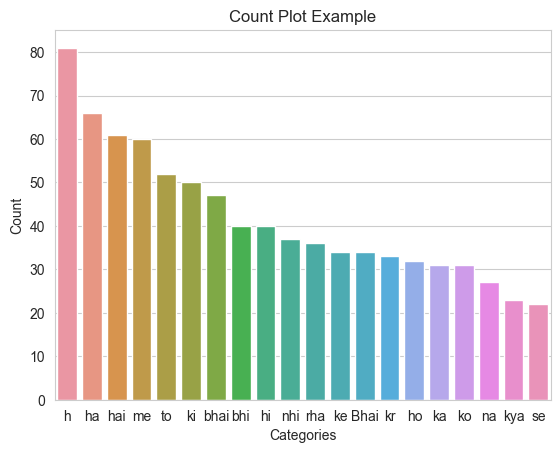

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a pandas Series from the data
series_data = pd.Series(my_list_without_empty)

# Generate the counts for each category
counts = series_data.value_counts()[:20]

# Create count plot
sns.barplot(x=counts.index, y=counts.values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot Example')

# Show the plot
plt.show()


In [219]:
import seaborn as sns
k = pd.DataFrame(my_list_without_empty)
k

,0
0,https://youtube.com/shorts/zvFPaM-NwHw?feature...
1,People
2,who
3,don't
4,lift
...,...
4067,hearted
4068,person
4069,thala
4070,Arnav..


In [220]:
def total_days( df): 
    start_date = df['date-time'][0]
    end_date = df['date-time'].iloc[-1]
    total_days = (end_date - start_date).days + 1
    return total_days

In [221]:
total_days(df)

216

In [222]:
# Media shared
df[df['Message'] == '<Media omitted>\n']

,date-time,User,Message,day,month,year,hour,minute
8,2023-04-12 15:49:00,Babu,<Media omitted>\n,12,4,2023,15,49
14,2023-04-12 15:55:00,Ankit Rajput,<Media omitted>\n,12,4,2023,15,55
22,2023-04-12 16:01:00,+91 84680 82755,<Media omitted>\n,12,4,2023,16,1
23,2023-04-16 11:51:00,Babu,<Media omitted>\n,16,4,2023,11,51
33,2023-04-22 10:11:00,Ankit Rajput,<Media omitted>\n,22,4,2023,10,11
...,...,...,...,...,...,...,...,...
958,2023-07-01 08:06:00,+91 84471 43485,<Media omitted>\n,1,7,2023,8,6
966,2023-07-01 09:01:00,+91 84471 43485,<Media omitted>\n,1,7,2023,9,1
1009,2023-07-07 10:21:00,+91 84471 43485,<Media omitted>\n,7,7,2023,10,21
1013,2023-07-08 13:47:00,+91 84471 43485,<Media omitted>\n,8,7,2023,13,47


In [223]:
import seaborn as sns

In [224]:
df['date'] = pd.to_datetime(df['year'] * 10000 + df['month'] * 100 + df['day'], format='%Y%m%d')

<Axes: ylabel='date'>

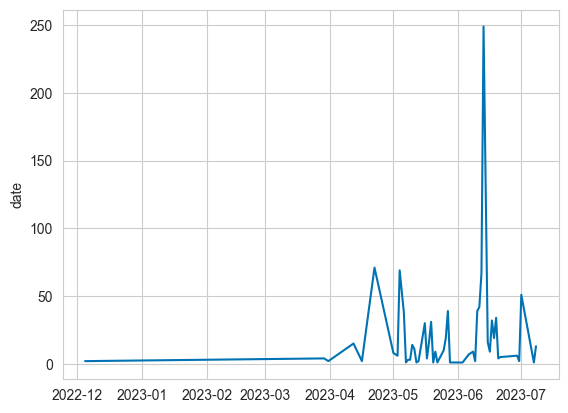

In [225]:
# particular dates message plot 
sns.lineplot(df['date'].value_counts())

In [226]:
df['User']

0          Notification
1          Notification
2       +91 84680 82755
3          Ankit Rajput
4       +91 84680 82755
             ...       
1018    +91 84471 43485
1019    +91 84471 43485
1020    +91 84471 43485
1021               Eddy
1022               Eddy
Name: User, Length: 1023, dtype: object

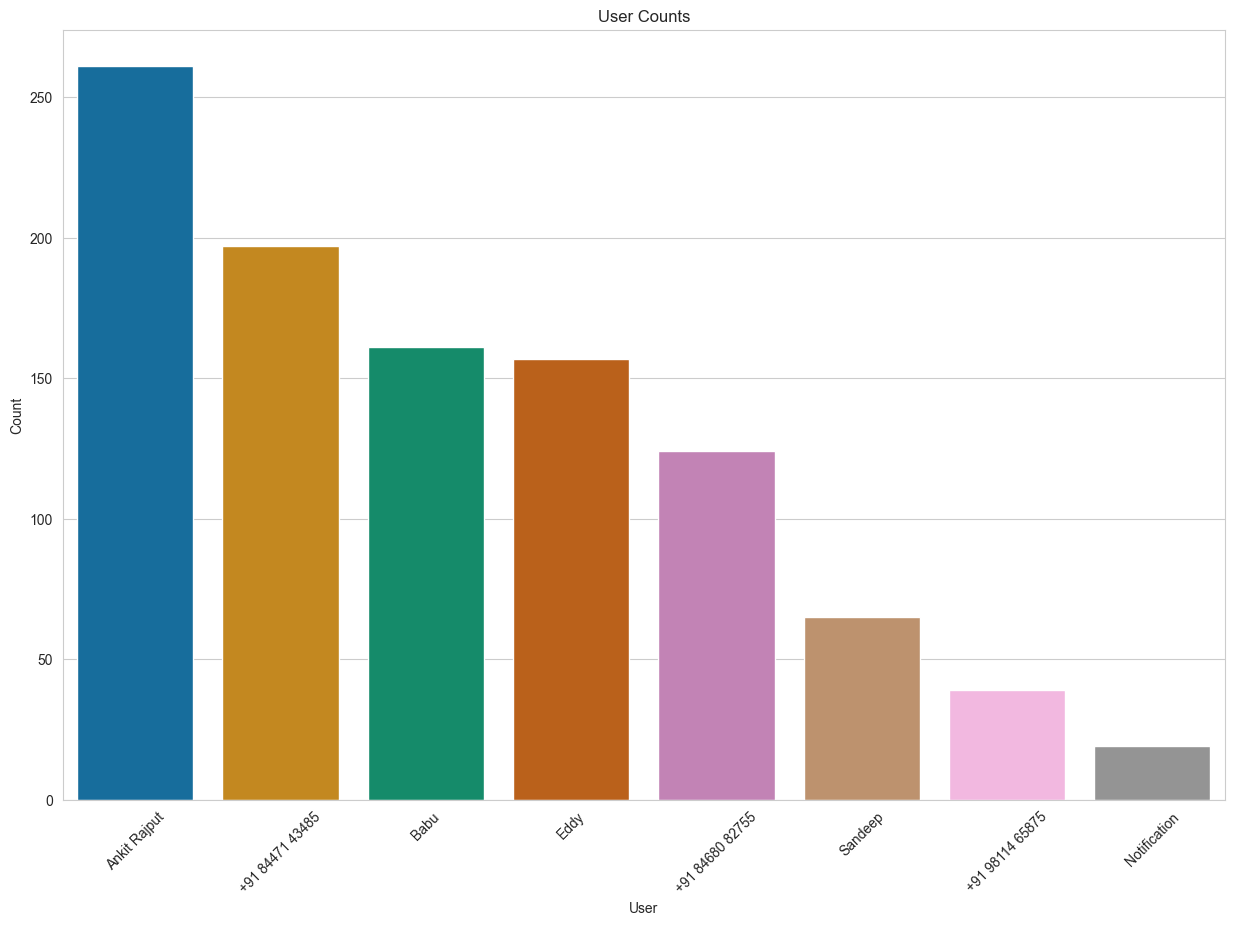

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
user_counts = df['User'].value_counts()
x = user_counts.index.tolist()
y = user_counts.tolist()
sns.set_style("whitegrid")
sns.barplot(x=x, y=y)

# Customize the plot
plt.xlabel('User')
plt.ylabel('Count')
plt.title('User Counts')

plt.xticks(rotation=45)

# Display the plot
plt.show()


In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1500x1000 with 0 Axes>

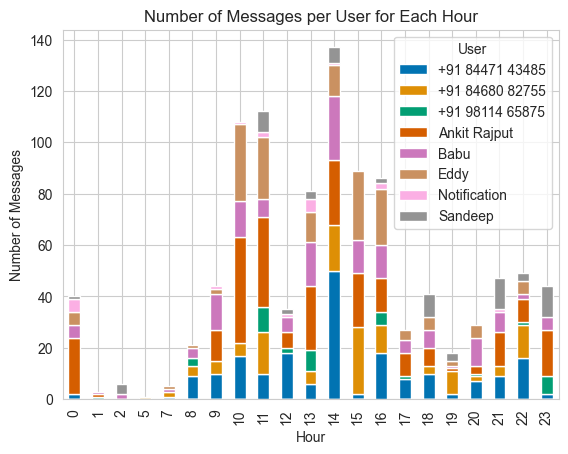

In [229]:
hour_user_counts = df.groupby(['hour', 'User']).size().reset_index(name='MessageCount')
# Pivot the data to create a wide-form DataFrame
pivot_df = hour_user_counts.pivot(index='hour', columns='User', values='MessageCount')
# Create the grouped bar plot
plt.figure(figsize=(15,10))
sns.set_palette('colorblind')  # Set the color palette
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per User for Each Hour')
plt.legend(title='User')
plt.show()


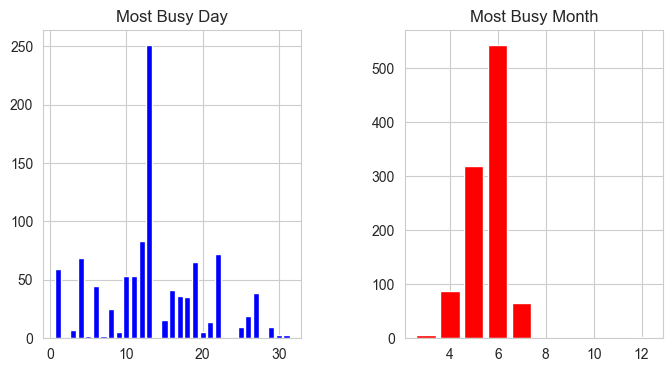

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most busiest day
x1 = df['day'].value_counts().index.tolist()
y1 = df['day'].value_counts().tolist()

# Most busiest month
x2 = df['month'].value_counts().index.tolist()
y2 = df['month'].value_counts().tolist()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Access the first subplot and plot the bar plot
axes[0].bar(x1, y1, color = 'blue')
axes[0].set_title('Most Busy Day')

# Access the second subplot and plot the bar plot
axes[1].bar(x2, y2, color = 'red')
axes[1].set_title('Most Busy Month')

# Adjust spacing between subplots if needed
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()



In [231]:
import emoji
emoji_list = []
for msg in df['Message']:
    emojis = emoji.emoji_list(msg)
    for i in emojis:
        emoji_list.append(i['emoji'])
print(emoji_list)
print(list(set(emoji_list)))

['🧐', '🥺', '🥺', '🤣', '🤣', '❤️', '😅', '😅', '😅', '🥲', '😒', '🐣', '🐣', '🤓', '👋', '😕', '🙂', '🤣', '🤣', '🤣', '🤓', '😅', '😅', '😭', '🤣', '🤣', '🤣', '😭', '😭', '😭', '😭', '🤣', '🤨', '🤨', '🤨', '🤨', '😅', '🫴', '❤️', '❤️', '🫂', '☕', '😅', '🫣', '😮\u200d💨', '😮\u200d💨', '🙂', '😂', '🙂', '😞', '🙂', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🥲', '🥲', '🤣', '🙂', '👏', '🎉', '😂', '😂', '🥲', '🥲', '😂', '😂', '😂', '😕', '🙂', '😞', '😞', '🙂', '😭', '🥲', '😂', '😂', '😒', '😅', '🔥', '🔥', '😂', '🥵', '🥵', '🥹', '🥹', '🥲', '😞', '😂', '😂', '😂', '😂', '🤣', '🤣', '😂', '😂', '🤣', '🤣', '👍', '🙂', '🙂', '🏳️', '😮\u200d💨', '🥲', '🗿', '🙂', '🥲', '🥲', '😅', '🤣', '🤣', '🫶', '😁', '😁', '🐔', '🙂', '🙂', '🙂', '🙂', '❤️\u200d🔥', '❤️\u200d🔥', '❤️', '🫥', '🫥', '🤣', '🤣', '🤣', '💀', '🫶', '🤣', '🤣', '😂', '😂', '😂', '☠️', '🙂', '🙂', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🫥', '🗿', '🤣', '🤣', '🤣', '🤣', '🤣', '🫥', '🤣', '🤣', '🫥', '🫥', '🫥', '🫥', '💀', '💀', '😇', '💀', '☠️', '💀', '💀', '☠️', '😶\u200d🌫️', '😂', '💀', '💀', '🫠', '💀', '💀', '☠️', '💀', '💀', '💀', '💀', '💀', '😒', '🔥', '😘', '💀', '☠️', '☠️', '💀', '☠️', '🤣

In [232]:
emoji_list = pd.DataFrame(emoji_list, columns=['emojis'])
emoji_list['emojis'].value_counts()[:5].index[4]

'😅'

In [233]:
print(emoji.emojize('\U0001fae5'))

🫥


In [234]:
print(emoji.emojize('🫥'))

🫥


In [235]:
df['day'].value_counts().index[0]

13